In [125]:
#generate random data for dataset with one feature
from sklearn.datasets import make_regression
import numpy as np
X,y =make_regression(n_samples=500, n_features=1, noise=10)
#Cast to default pytorch dtype
X,y = X.astype(np.float32), y.astype(np.float32)

In [126]:
import torch
#create tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y).reshape(-1,1)

In [127]:
#Initialising weights and bias
w = torch.randn(1, 1, requires_grad=True)# autograd for computation graph
b = torch.randn(1, requires_grad=True)
w, b

(tensor([[0.9170]], requires_grad=True), tensor([0.6379], requires_grad=True))

In [128]:
#Define forward pass
def forward(x):
  return x*w+ b

In [129]:
#Define Mean Squared Error Loss(for regression)
def mse_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

In [130]:
lr = 0.001 #Learning rate
losses = []#Empty list to accumulate the losses for plotting loss curve
for epoch in range(10000):

    # forward pass
    y_pred = forward(X_tensor)
    loss = mse_loss(y_pred, y_tensor)
    losses.append(loss.item())

    # backward pass
    loss.backward()

    # update parameters (No optimizer)
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # reset gradients
    w.grad.zero_()
    b.grad.zero_()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 6680.1504
Epoch 500, Loss: 952.3858
Epoch 1000, Loss: 203.2534
Epoch 1500, Loss: 105.1350
Epoch 2000, Loss: 92.2644
Epoch 2500, Loss: 90.5735
Epoch 3000, Loss: 90.3511
Epoch 3500, Loss: 90.3217
Epoch 4000, Loss: 90.3179
Epoch 4500, Loss: 90.3174
Epoch 5000, Loss: 90.3173
Epoch 5500, Loss: 90.3173
Epoch 6000, Loss: 90.3173
Epoch 6500, Loss: 90.3173
Epoch 7000, Loss: 90.3173
Epoch 7500, Loss: 90.3173
Epoch 8000, Loss: 90.3173
Epoch 8500, Loss: 90.3173
Epoch 9000, Loss: 90.3173
Epoch 9500, Loss: 90.3173


In [131]:
print("Learned w:", w.item())
print("Learned b:", b.item())

Learned w: 81.4482192993164
Learned b: -0.27858737111091614


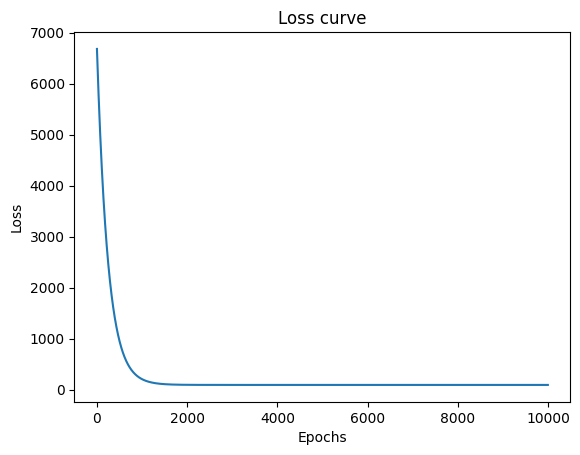

In [132]:
#Plot loss curve
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()